# Features to **ADD**:
 Temporal Features (from START TIME):
   + HourOfDay
   + DayOfWeek
   + PartOfDay: Categorical feature (e.g., morning, afternoon, evening, night) based on HourOfDay.

In [ ]:
import numpy as numpy
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

df_bike_clean = pd.read_csv("cleaned_bike_data.csv")
df_bike_clean.head()

In [28]:
# categories: morning, afternoon, evening, night
# time into the datetime format
# extract the hours seperately as a value without the minutes and seconds
df_bike_clean['START TIME'] = pd.to_datetime(df_bike_clean['START TIME'])
df_bike_clean['hour'] = df_bike_clean['START TIME'].dt.hour

# method for sorting into the day phases
def categorize_day_phases(hour):
    if 6 <= hour < 12:
        return 1
    elif 12 <= hour < 18:
        return 2
    elif 18 <= hour < 24:
        return 3
    else:
        return 4

# apply for each row
df_bike_clean['TIME PHASES'] = df_bike_clean['hour'].apply(categorize_day_phases)

# we dont need the hours anymore
df_bike_clean.drop(columns=['hour'], inplace=True)

df_bike_clean[['START TIME', 'TIME PHASES']].head()

# 1 - 4 zahlen für: done

,START TIME,TIME PHASES
0,2019-04-03 08:29:54,1
1,2019-04-03 08:29:52,1
2,2019-04-03 08:29:52,1
3,2019-04-03 08:29:50,1
4,2019-04-03 08:29:45,1


In [44]:
df_bike_clean.head()

,START TIME,BIKE ID,TRIP DURATION,FROM STATION ID,USER TYPE,GENDER,FROM LOCATION,AGE,TIME PHASES,HOUR OF DAY,END TIME,DURATION_GROUP
0,2019-04-03 08:29:54,5313,537,18,Subscriber,Male,POINT (-87.637321 41.883132),37,1,8,2019-04-03 08:38:51,"[0, 1200)"
1,2019-04-03 08:29:52,5884,224,137,Subscriber,Male,POINT (-87.651062 41.862378),54,1,8,2019-04-03 08:33:36,"[0, 1200)"
2,2019-04-03 08:29:52,4048,1085,210,Subscriber,Male,POINT (-87.667747 41.90345),32,1,8,2019-04-03 08:47:57,"[0, 1200)"
3,2019-04-03 08:29:50,2638,309,96,Subscriber,Male,POINT (-87.6445705849 41.88461618962),31,1,8,2019-04-03 08:34:59,"[0, 1200)"
4,2019-04-03 08:29:45,3179,501,77,Subscriber,Male,POINT (-87.641066 41.882242),41,1,8,2019-04-03 08:38:06,"[0, 1200)"


In [ ]:
# sort into weekdays
# one hot coded columns method
df_bike_cleaned = df_bike_clean.copy()

# extract day the of the week
df_bike_cleaned['DAY OF WEEK'] = df_bike_cleaned["START TIME"].dt.day_name()

#ChatGPT: i want to improve the hot one coding because it does not start with monday, the column starts with wednesday.
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_bike_cleaned['DAY OF WEEK'] = pd.Categorical(df_bike_cleaned['DAY OF WEEK'], categories=day_order, ordered=True)
# until here ------------------

days_of_week = pd.get_dummies(df_bike_cleaned['DAY OF WEEK'])
days_of_week.drop(columns=["Sunday"], inplace=True)

# add column to database
df_bike_cleaned = pd.concat([df_bike_cleaned, days_of_week], axis=1)

# we do not need the column anymore
df_bike_cleaned.drop(columns=['DAY OF WEEK'], inplace=True)

df_bike_cleaned.head()

#reihenfolge und eine spalte löschen: done

,START TIME,BIKE ID,TRIP DURATION,FROM STATION ID,USER TYPE,GENDER,FROM LOCATION,AGE,TIME PHASES,HOUR OF DAY,END TIME,DURATION_GROUP,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,2019-04-03 08:29:54,5313,537,18,Subscriber,Male,POINT (-87.637321 41.883132),37,1,8,2019-04-03 08:38:51,"[0, 1200)",False,False,True,False,False,False
1,2019-04-03 08:29:52,5884,224,137,Subscriber,Male,POINT (-87.651062 41.862378),54,1,8,2019-04-03 08:33:36,"[0, 1200)",False,False,True,False,False,False
2,2019-04-03 08:29:52,4048,1085,210,Subscriber,Male,POINT (-87.667747 41.90345),32,1,8,2019-04-03 08:47:57,"[0, 1200)",False,False,True,False,False,False
3,2019-04-03 08:29:50,2638,309,96,Subscriber,Male,POINT (-87.6445705849 41.88461618962),31,1,8,2019-04-03 08:34:59,"[0, 1200)",False,False,True,False,False,False
4,2019-04-03 08:29:45,3179,501,77,Subscriber,Male,POINT (-87.641066 41.882242),41,1,8,2019-04-03 08:38:06,"[0, 1200)",False,False,True,False,False,False


In [ ]:
#hour of day 
df_bike_clean['START TIME'] = pd.to_datetime(df_bike_clean['START TIME'])
df_bike_clean['HOUR OF DAY'] = df_bike_clean['START TIME'].dt.hour
df_bike_clean.tail()

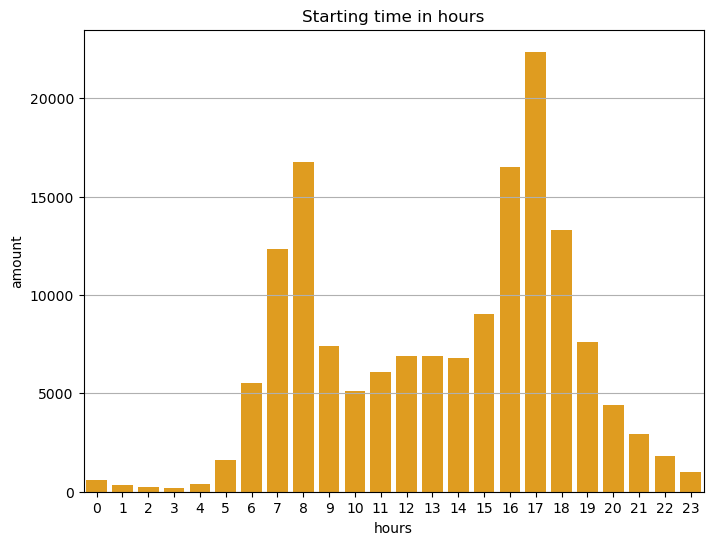

In [45]:
# bar chart how many trips startet in each hour
plt.figure(figsize=(8,6))
sns.countplot(x='HOUR OF DAY', data=df_bike_clean, color= "orange")

plt.title("Starting time in hours")
plt.xlabel("hours")
plt.ylabel("amount")
plt.grid(axis= 'y')

plt.show()

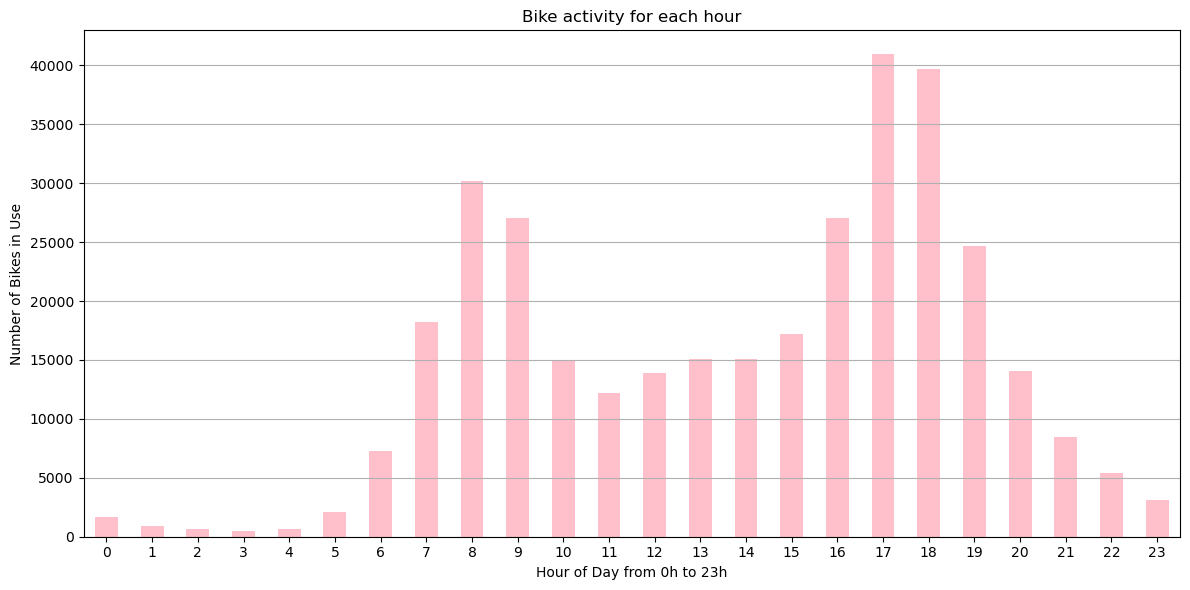

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#ChatGPT: 
# (…) but lets change it so that independent from the date, 
# the count for the hour is shownbut lets change it so that independent from the date, the count for the hour is shown

# need to determine the end time with the trip duration
df_bike_clean['START TIME'] = pd.to_datetime(df_bike_clean['START TIME'])
df_bike_clean['END TIME'] = df_bike_clean['START TIME'] + pd.to_timedelta(df_bike_clean['TRIP DURATION'], unit='s')

# we need an array or series in this case for each hour
hourly_counts = pd.Series(0, index=range(24))

# for each trip we need to determine the start and end
# then we have to add them as one count for the designated hour
for _, row in df_bike_clean.iterrows():
    start = row['START TIME']
    end = row['END TIME']
    
    # we need the range of the trip
    start_hour = start.hour
    end_hour = end.hour + (end.minute > 0 or end.second > 0)  # round up if not exact
    
    # case: if it passes midnight during the trip
    if end < start:
        end_hour += 24  # if data contains such cases

    for h in range(start_hour, end_hour + 1):
        hourly_counts[h % 24] += 1  # modulo for wrapping around 24h


plt.figure(figsize=(12, 6))
hourly_counts.sort_index().plot(kind='bar', color='pink')

plt.title('Bike activity for each hour')
plt.xlabel('Hour of Day from 0h to 23h')
plt.ylabel('Number of Bikes in Use')
plt.xticks(rotation=0) 
# ChatGPT: 
# "how do i rotate the numbers of the x axes in the bar char"
# Example: Rotate x-axis labels 45 degrees
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
# average bike duration

bike_trip_mean = df_bike_clean['TRIP DURATION'].aggregate('mean')
print(bike_trip_mean)

bike_trip_median = df_bike_clean['TRIP DURATION'].aggregate('median')
print(bike_trip_median)

print(df_bike_clean['TRIP DURATION'].max())

# bar chart for every trip duration
# trip_duration_count = df_bike_clean['TRIP DURATION'].value_counts().sort_index()

# plt.figure(figsize=(8,6))
# trip_duration_count.plot(kind="bar", color="green")
# problem: there are too many different trip durations, so it is hard to analyze

# solution: bar chart for trip duration for every 5 minutes
# define that every 5 minutes is one category


# bins = 

# df_bike_clean['DURATION_GROUP'] = pd.cut(df_bike_clean['TRIP DURATION'], bins=bins, right=False)
# duration_group_counts = df_bike_clean['DURATION_GROUP'].value_counts().sort_index()

# duration_group_counts.plot(kind='bar', color='orange')

# standard labeling
# plt.xlabel("Trip duration groups")
# plt.ylabel("Count of each trip duration")
# plt.title("Trip duration")  
# plt.grid(axis="y")
# plt.xticks(rotation = 45)
# plt.tight_layout()
# plt.show()